# Regresión

# Regresión con ceros inflados

https://www.uv.mx/mapli/files/2012/05/Un-Modelo-de-Regresion-Poisson-Inflado-con-Ceros-para-Analizar-Datos-de-un-experimento-de-Fungicidas-en-Jitomate.pdf (Páginas 18-20)

http://www.iesta.edu.uy/wp-content/uploads/2018/01/pasantia_martinez_voucher.pdf (Páginas 40-43)

http://www.aprendemachinelearning.com/regresion-lineal-en-espanol-con-python/ (Fórmula)

http://www.academia.edu/20664018/Zero-inflated_and_Hurdle_models_of_count_data_with_extra_example_from_an_HIV-Risk_reduction_intervention_trial 

El modelo de regresion cero inflado fue propuesto por Lambert con el fin de,como  en  los  modelos  Hurdle,  tratar  el  problema  en  los  datos  que  muestran  una cantidad de ceros mucho m ́as alta que la que es compatible con las distribuciones usualmente utilizadas, es decir, los datos a ser estudiados presentan m ́as ceros que los esperados. Al igual que los modelos de regresi ́on Hurdle, este modelo combina una variable binaria con un modelo de conteo Poisson, PIG o Binomial Negativo. Es un modelo mixto de dos componentes que da mayor peso a la probabilidad de que la variable sea igual a cero, por lo que la funci ́on de probabilidad para un modelo de  regresi ́on  Cero  Inflado  es  una  mezcla  de  una  funci ́on  de  masa  concentrada  en cero y un modelo perteneciente a la familia exponencial. A diferencia de los Modelos Hurdle, el primer componente genera s ́olo conteos cero, pero el segundo genera el rango completo de conteos, incluyendo los ceros

En 1992Lambert, ideó el modelo Poisson inﬂado con ceros (ZIP), el cual postula de que existe: una probabilidad pi de que la i-ésima observación sea siempre igual a cero, es decir que la variable respuesta,Yi, tomesiempre el valor de cero y una probabilidad 1−pi de que el valor de la i-ésima observación proceda deuna distribución Poisson. 

# Regresión lineal múltiple

Se sigen los siguientes pasos:

1. Se importan las librerias necesarias
2. Se Importan los datos
3. Crear los datos de entrenamiento y prueba
4. Normalización de los datos. Definición de variables a predecir y predictoras
5. Definición de la función ventas y gradiente
6. Estimación de los coeficientes de regresión
7. Pronóstico con los valores de prueba

In [39]:
#Se importan las librerias

import pandas as pd      #IMPORTANTE NO OLVIDAR ヽ(•‿ •)ノ
import numpy as np
pd.set_option("display.max_rows", 9) # Especificar el número de filas a mostrar
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import r2_score, mean_squared_error,classification_report, confusion_matrix

In [40]:
#Se carga el archivo con los datos limpios

total=pd.read_excel("TOTALULIMPIO2.xlsx",index_col=0) #Recursos:amarillo #Capacidades:rojo #Resultados:azul
total

,ESTABLECIMIENTO,DPTO,CIIU,PERIODO,SOCIOS,PERMANENTE,APRENDIZ,PROD_NAL,PROD_EXT,OBRERO,...,VALORACTIVOS,PROD_BRUTA,PROD_INDUST,INVERBRUTA,TEMPORALDIRECTO,VAL_AGREGADO,MPCOMPRADA,COMPRAS_MP_EXTERIOR,EXPORTACIONES,VENTAS
0,145898,11,1810,2008,1.665038,2.000000,5.370346,2.000000,2.2875,10.0,...,641984.0,3525900,3525900,343423.189677,79.846659,912761,2602400.0,5.155038e+06,4.996960e+06,3460300.0
1,145904,11,1810,2008,2.000000,7.000000,5.370346,12.562613,2.2875,3.0,...,201817.0,296411,296411,9406.000000,79.846659,122106,102941.0,5.155038e+06,4.996960e+06,296411.0
2,145912,11,1810,2008,1.665038,46.562075,5.370346,1.000000,2.2875,30.0,...,143460.0,1594496,1594496,3200.000000,46.000000,366562,867491.0,5.155038e+06,1.946210e+05,1597520.0
3,145913,11,1741,2008,1.000000,46.562075,5.370346,2.000000,2.2875,3.0,...,8704.0,166200,166200,-2000.000000,79.846659,92868,26720.0,5.155038e+06,4.996960e+06,231480.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11635,987459,8,1410,2016,2.000000,46.562075,3.000000,12.562613,2.2875,27.0,...,188741.0,1290356,1290356,11182.000000,54.000000,790408,618268.0,5.155038e+06,4.996960e+06,1100444.0
11636,987465,8,1410,2016,1.665038,40.000000,2.000000,12.562613,2.2875,29.0,...,465071.0,3679414,3679414,343423.189677,8.000000,1476328,2164604.0,5.155038e+06,4.996960e+06,3300208.0
11637,987467,8,1410,2016,1.665038,36.000000,12.000000,9.000000,2.2875,260.0,...,2874293.0,15549225,15550083,503083.000000,400.000000,7454626,6940062.0,5.155038e+06,1.608454e+06,15443532.0
11638,987483,8,1410,2016,1.000000,3.000000,2.000000,12.562613,2.2875,11.0,...,300842.0,1284882,1284882,343423.189677,18.000000,835716,421689.0,5.155038e+06,1.717450e+05,1180126.0


In [41]:
#Crear los datos de entrenamiento y prueba

X=total.drop(["VENTAS","SOCIOS","COMPRAS_MP_EXTERIOR"],axis=1).values
y=total["VENTAS"].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,
                                               random_state=123)

In [42]:
#Normalización de los datos. Definición de variables a predecir y predictoras

# Se toma la media de los valores de entrenamiento
scaler= preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

#Adicionar una columa de 1 para B0
X_test_scaled= np.insert(X_test_scaled,0,1,axis=1) 
X_train_scaled= np.insert(X_train_scaled,0,1,axis=1)

n=len(X_train_scaled[0]) # Número de variables

# Genearación de betas iniciales
B=np.zeros(n)
alpha=0.0005                             
# Tasa de aprendizaje
X_train_scaled.shape

(8236, 62)

In [43]:
#Definición de la función ventas y gradiente

# Función ventas
def ventas(X,Y,B):
    m=len(Y)
    J=np.sum((X.dot(B)-Y)**2)/(2*m)
    return J

# Gradiente
def grad(X,Y,B,alpha,iterations):
    venta_hist=[0]*iterations
    m=len(Y)
    for i in range(iterations):
        h=X.dot(B)
        loss= h-Y
        gradient= X.T.dot(loss)/m
        B=B-alpha*gradient
        venta=ventas(X,Y,B)
        venta_hist[i]=venta
    return B, venta_hist, loss

In [44]:
#Estimación de los coeficientes de regresión

Betas, venta_hist, loss= grad(X_train_scaled,y_train,B,alpha,10000)
for i in range(len(Betas)):
    print("Beta %s :"%(i), Betas[i])
print("Ventas en la última iteración:","%.4f"%venta_hist[-1])

Beta 0 : 1062807.5591985933
Beta 1 : 11288.095904511883
Beta 2 : -34501.97592205591
Beta 3 : -31540.856906328154
Beta 4 : 10922.081999150072
Beta 5 : 38485.31367091764
Beta 6 : -33981.031002091455
Beta 7 : 38149.263591738076
Beta 8 : 1032.7725420938032
Beta 9 : 51298.0700214575
Beta 10 : 101153.52527598817
Beta 11 : 150677.7218788372
Beta 12 : 305552.5572447349
Beta 13 : 21803.69699948789
Beta 14 : -33316.58036292844
Beta 15 : 644.8697123853156
Beta 16 : 1974.7685858084267
Beta 17 : -20611.96960895299
Beta 18 : -9972.34980358345
Beta 19 : 18918.08103049268
Beta 20 : 57200.320002783454
Beta 21 : 19886.521455052974
Beta 22 : -9780.854014147857
Beta 23 : 25194.587421218454
Beta 24 : 22454.725174477055
Beta 25 : 1341.474551385004
Beta 26 : -62385.196338403206
Beta 27 : 14040.591798851192
Beta 28 : -39302.46408278506
Beta 29 : -59739.589819116154
Beta 30 : 4210.064524777482
Beta 31 : -57344.89474484543
Beta 32 : -24417.745866419413
Beta 33 : -16768.23737958917
Beta 34 : 8821.939281083241
Be

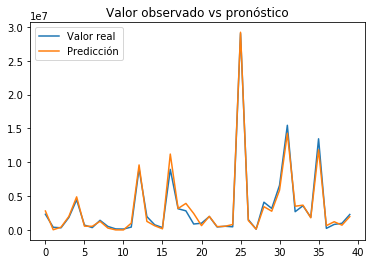

In [7]:
# Predicción con los valores de prueba

pronostico = []
for i in X_test_scaled:
    val = np.sum(i*Betas)
    pronostico.append(val)

plt.plot(y_test[:40], label='Valor real')
plt.plot(pronostico[:40], label='Predicción')
plt.title("Valor observado vs pronóstico")
plt.legend(loc=2)
plt.show()

In [8]:
y1=y_test.tolist()
Coef=r2_score(y1,pronostico)*100
print(" El coeficiente de determinación (R^2) es: %.2f "%Coef + "%")

 El coeficiente de determinación (R^2) es: 97.07 %


Las menores ventas son $: 423634628333.8746


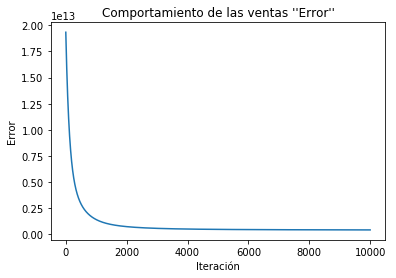

In [9]:
minMse=min(venta_hist)
print("Las menores ventas son $: %s" %(minMse))

xaxis=range(len(venta_hist))
plt.plot(xaxis,venta_hist)

plt.title("Comportamiento de las ventas ''Error''")
plt.xlabel("Iteración")
plt.ylabel("Error")
plt.savefig("Costo_error")
plt.show()

# Forma 2

In [30]:
import statsmodels.api as sm

X=total.drop(["VENTAS","SOCIOS","COMPRAS_MP_EXTERIOR"],axis=1).values
y=total["VENTAS"].values

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     7751.
Date:                Sun, 16 Dec 2018   Prob (F-statistic):               0.00
Time:                        00:42:45   Log-Likelihood:            -1.5472e+05
No. Observations:               10295   AIC:                         3.095e+05
Df Residuals:                   10236   BIC:                         3.100e+05
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0505      0.022      2.261      0.024       0.007       0.094
x2          -117.4156    328.113     -0.358      0.720    -760.582     525.751
x3           -13.3189     78.090     -0.171      0.865    -166.390     139.753
x4          5477.7764   6338.416      0.864      0.387   -6946.760    1.79e+04
x5          2780.4299    315.575      8.811      0.000    2161.841    3399.019
x6         -1559.6334   4278.066     -0.365      0.715   -9945.481    6826.214
x7          1420.0823   1362.522      1.042      0.297   -1250.727    4090.892
x8         -7.898e+04   1.19e+05     -0.662      0.508   -3.13e+05    1.55e+05
x9         -1771.2389    542.471     -3.265      0.001   -2834.589    -707.889
x10         3700.9010    822.149      4.501      0.000    2089.328    5312.474
x11         1060.2983    534.696      1.983      0.047      12.189    2108.408
x12            0.0486      0.012      4.137      0.000       0.026       0.072
x13            0.3641      0.294      1.237      0.216      -0.213       0.941
x14           -0.0041      0.341     -0.012      0.990      -0.673       0.665
x15           -0.2875      0.297     -0.969      0.333      -0.869       0.294
x16            0.1896      5.406      0.035      0.972     -10.407      10.786
x17           -3.7739      1.454     -2.595      0.009      -6.625      -0.923
x18            3.4211      1.760      1.944      0.052      -0.028       6.870
x19            0.2642      0.101      2.625      0.009       0.067       0.462
x20            0.5592      0.365      1.531      0.126      -0.157       1.275
x21            1.5611      1.391      1.122      0.262      -1.166       4.288
x22           -0.1442      0.367     -0.393      0.694      -0.864       0.575
x23            0.4559      0.375      1.216      0.224      -0.279       1.191
x24           -0.1942      0.457     -0.425      0.671      -1.089       0.701
x25            0.6698      0.458      1.463      0.143      -0.228       1.567
x26           -0.0119      0.002     -4.848      0.000      -0.017      -0.007
x27            0.0610      0.023      2.661      0.008       0.016       0.106
x28            0.0069      0.024      0.288      0.773      -0.040       0.054
x29           -0.0446      0.017     -2.668      0.008      -0.077      -0.012
x30            0.0571      0.024      2.411      0.016       0.011       0.104
x31           -0.0461      0.013     -3.618      0.000      -0.071      -0.021
x32          -10.3830      2.568     -4.043      0.000     -15.417      -5.349
x33          -14.0073      3.758     -3.727      0.000     -21.374      -6.641
x34            1.6973      6.838      0.248      0.804     -11.707      15.102
x35            6.8603     12.767      0.537      0.591     -18.165      31.885
x36         -128.8765    140.602     -0.917      0.359    -404.483     146.730
co

In [38]:
import statsmodels.api as sm
X=total.drop(["VENTAS","SOCIOS","COMPRAS_MP_EXTERIOR"],axis=1).values
Y=total["VENTAS"].values

X_1 = sm.add_constant (X) 
resultados = sm.OLS (Y, X_1) .fit () 
resultados.params 

array([ 5.04659188e-02, -1.17415618e+02, -1.33189295e+01,  5.47777636e+03,
        2.78042986e+03, -1.55963343e+03,  1.42008228e+03, -7.89764625e+04,
       -1.77123895e+03,  3.70090101e+03,  1.06029834e+03,  4.86350424e-02,
        3.64147172e-01, -4.11068962e-03, -2.87478606e-01,  1.89584365e-01,
       -3.77392603e+00,  3.42106045e+00,  2.64200054e-01,  5.59191290e-01,
        1.56106739e+00, -1.44198770e-01,  4.55918608e-01, -1.94205404e-01,
        6.69844520e-01, -1.19341711e-02,  6.09723771e-02,  6.89302586e-03,
       -4.46215210e-02,  5.70978789e-02, -4.61440833e-02, -1.03830211e+01,
       -1.40072948e+01,  1.69730830e+00,  6.86027577e+00, -1.28876457e+02,
       -4.55120197e+01, -3.02677695e+01, -2.59515807e+00,  1.47180120e-01,
       -5.03427245e-02,  3.09997595e-01,  9.97950065e+00, -7.21937184e-01,
        1.58604804e+00, -1.16749083e-01, -4.89303803e+00,  6.88327814e-03,
       -1.47623789e-02,  1.20651884e-02,  5.89780517e-01,  8.45567048e-02,
       -5.04655052e-02,  